<a href="https://colab.research.google.com/github/Caory2/se-alesysistemas/blob/main/DESARROLLO_DE_PARCIAL1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DESARROLLO DE PARCIAL #1

*   Pregunta #1
Cuál es la señal obtenida en tiempo discreto al utilizar un conversor análogo digital de 5 bits con frecuencia de muestreo de $5kHz$, entrada análoga de -3.3 a 3.3 [v], aplicado a la señal continua $x(t) = 0.3 \cos(1000\pi t-\pi/4) +
0.6 \sin(2000\pi t) + 0.1 \cos(11000\pi t-\pi)$?. Realizar la simulación del proceso de digitalización incluyendo al menos 3 ciclos de la señal $x(t)$.
En caso de que la digitalización no sea apropiada, diseñe e implemente un conversor adecuado para la señal estudiada. El convesor debe permitir configurar la cantidad de bits, rango de la entrada análoga y la frecuencia de muestreo, indicándole al usuario si dicha frecuencia es apropiada o no, y graficar la señal continua, discreta y digital.






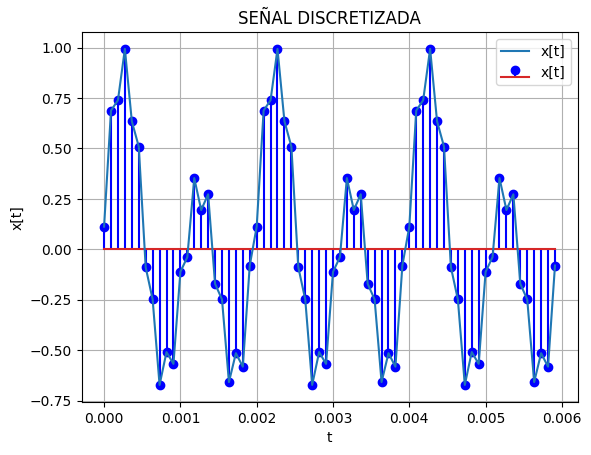

In [34]:
# importar librerias
import numpy as np
from scipy.spatial.distance import cdist
import math
import random
import matplotlib.pyplot as plt

#DEFINIR PARAMETROS DE LA SEÑAL asignar las variables

#AMPLITUDES
A1=0.3
A2=0.6
A3=0.1

#FRECUENCIAS ANGULARES
w1=1000*np.pi
w2=2000*np.pi
w3=11000*np.pi

#PERIODOS
T1=2*np.pi/w1
T2=2*np.pi/w2
T3=2*np.pi/w3

#FRECUENCIAS
F1=w1/(2*np.pi)
F2=w2/(2*np.pi)
F3=w3/(2*np.pi)

#FRECUENCIA DE MUESTREO SEGUN NYSQUISTt
FS=2*max(F1,F2,F3)

#PERIODO SEÑAL CUASIPERIODICA T=MCM(T1,T2)
T=1/500

ti=0#tiempo inicial
tf=3*T #tiempo final


tv=np.arange(ti,tf,1/FS) #vector de tiempo

#ecuacion
x=A1*np.cos(w1*tv-(np.pi/4)) +A2*np.sin(w2*tv)+A3*np.cos(w3*tv-np.pi)



plt.stem(tv,x,"b", label="x[t]")
plt.plot(tv,x, label="x[t]")

plt.legend()
plt.xlabel("t")
plt.ylabel("x[t]")
plt.title("SEÑAL DISCRETIZADA")
plt.grid()
plt.show()


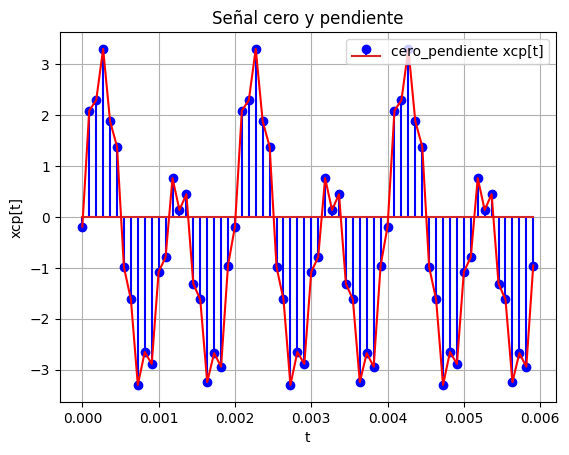

In [32]:
#crear funcion cero pendiente
def my_ceropen(x,ymin = -5, ymax = 5): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

#Definiendo rango de medicion
ymin=-3.3
ymax=3.3

#Señal cero pendiente
xcp =my_ceropen(x,ymin=ymin, ymax=ymax)
plt.title("Señal cero y pendiente")
plt.stem(tv,xcp,"b",label="cero_pendiente xcp[t]")
plt.plot(tv,xcp,c="r")
plt.legend()
plt.xlabel("t")
plt.ylabel("xcp[t]")
plt.grid()
plt.show()

In [4]:
#función cuantización punto a punto

def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados

  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]

#Parametros de cuantizacion
nbits=5
num_est=2**nbits
vq= np.linspace(ymin,ymax,num_est) #Estados de cuantizacion
vq

array([-3.3       , -3.08709677, -2.87419355, -2.66129032, -2.4483871 ,
       -2.23548387, -2.02258065, -1.80967742, -1.59677419, -1.38387097,
       -1.17096774, -0.95806452, -0.74516129, -0.53225806, -0.31935484,
       -0.10645161,  0.10645161,  0.31935484,  0.53225806,  0.74516129,
        0.95806452,  1.17096774,  1.38387097,  1.59677419,  1.80967742,
        2.02258065,  2.23548387,  2.4483871 ,  2.66129032,  2.87419355,
        3.08709677,  3.3       ])

In [5]:
#recorrer vector cero y spam discretizado para cuantizar (CUANTIZANDO)

for i in range(xcp.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(xcp[i],vq)
   else:
     yq = np.append(yq,my_cuantizador(xcp[i],vq)) #apilar datos cuantizando si i>0

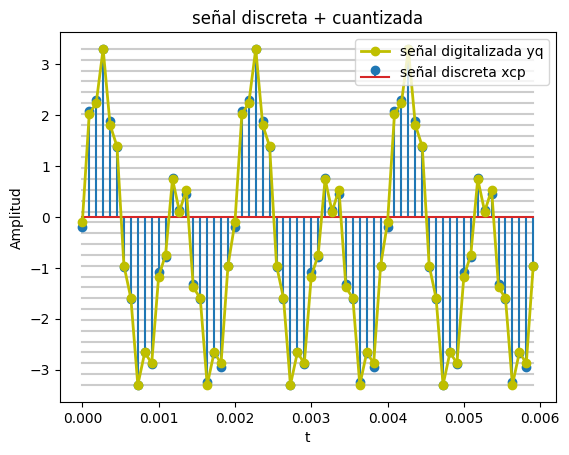

In [6]:
#graficar señales

#estados de cuantización (LINEAS GRISES)
for v in vq:
  plt.plot(tv,v*np.ones(len(tv)),c='#cccccc')


# graficar señal Digital (discreta + cuantizada)
plt.stem(tv,xcp, label='señal discreta xcp')#señal  discreta cp
plt.plot(tv,yq,c='y',marker='o',label='señal digitalizada yq', linewidth=2) #SEÑAL DIGITALIZADA
#plt.plot(tv,xcp,c='r', label='xcp')#cs continua


plt.legend()
plt.title("señal discreta + cuantizada")
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

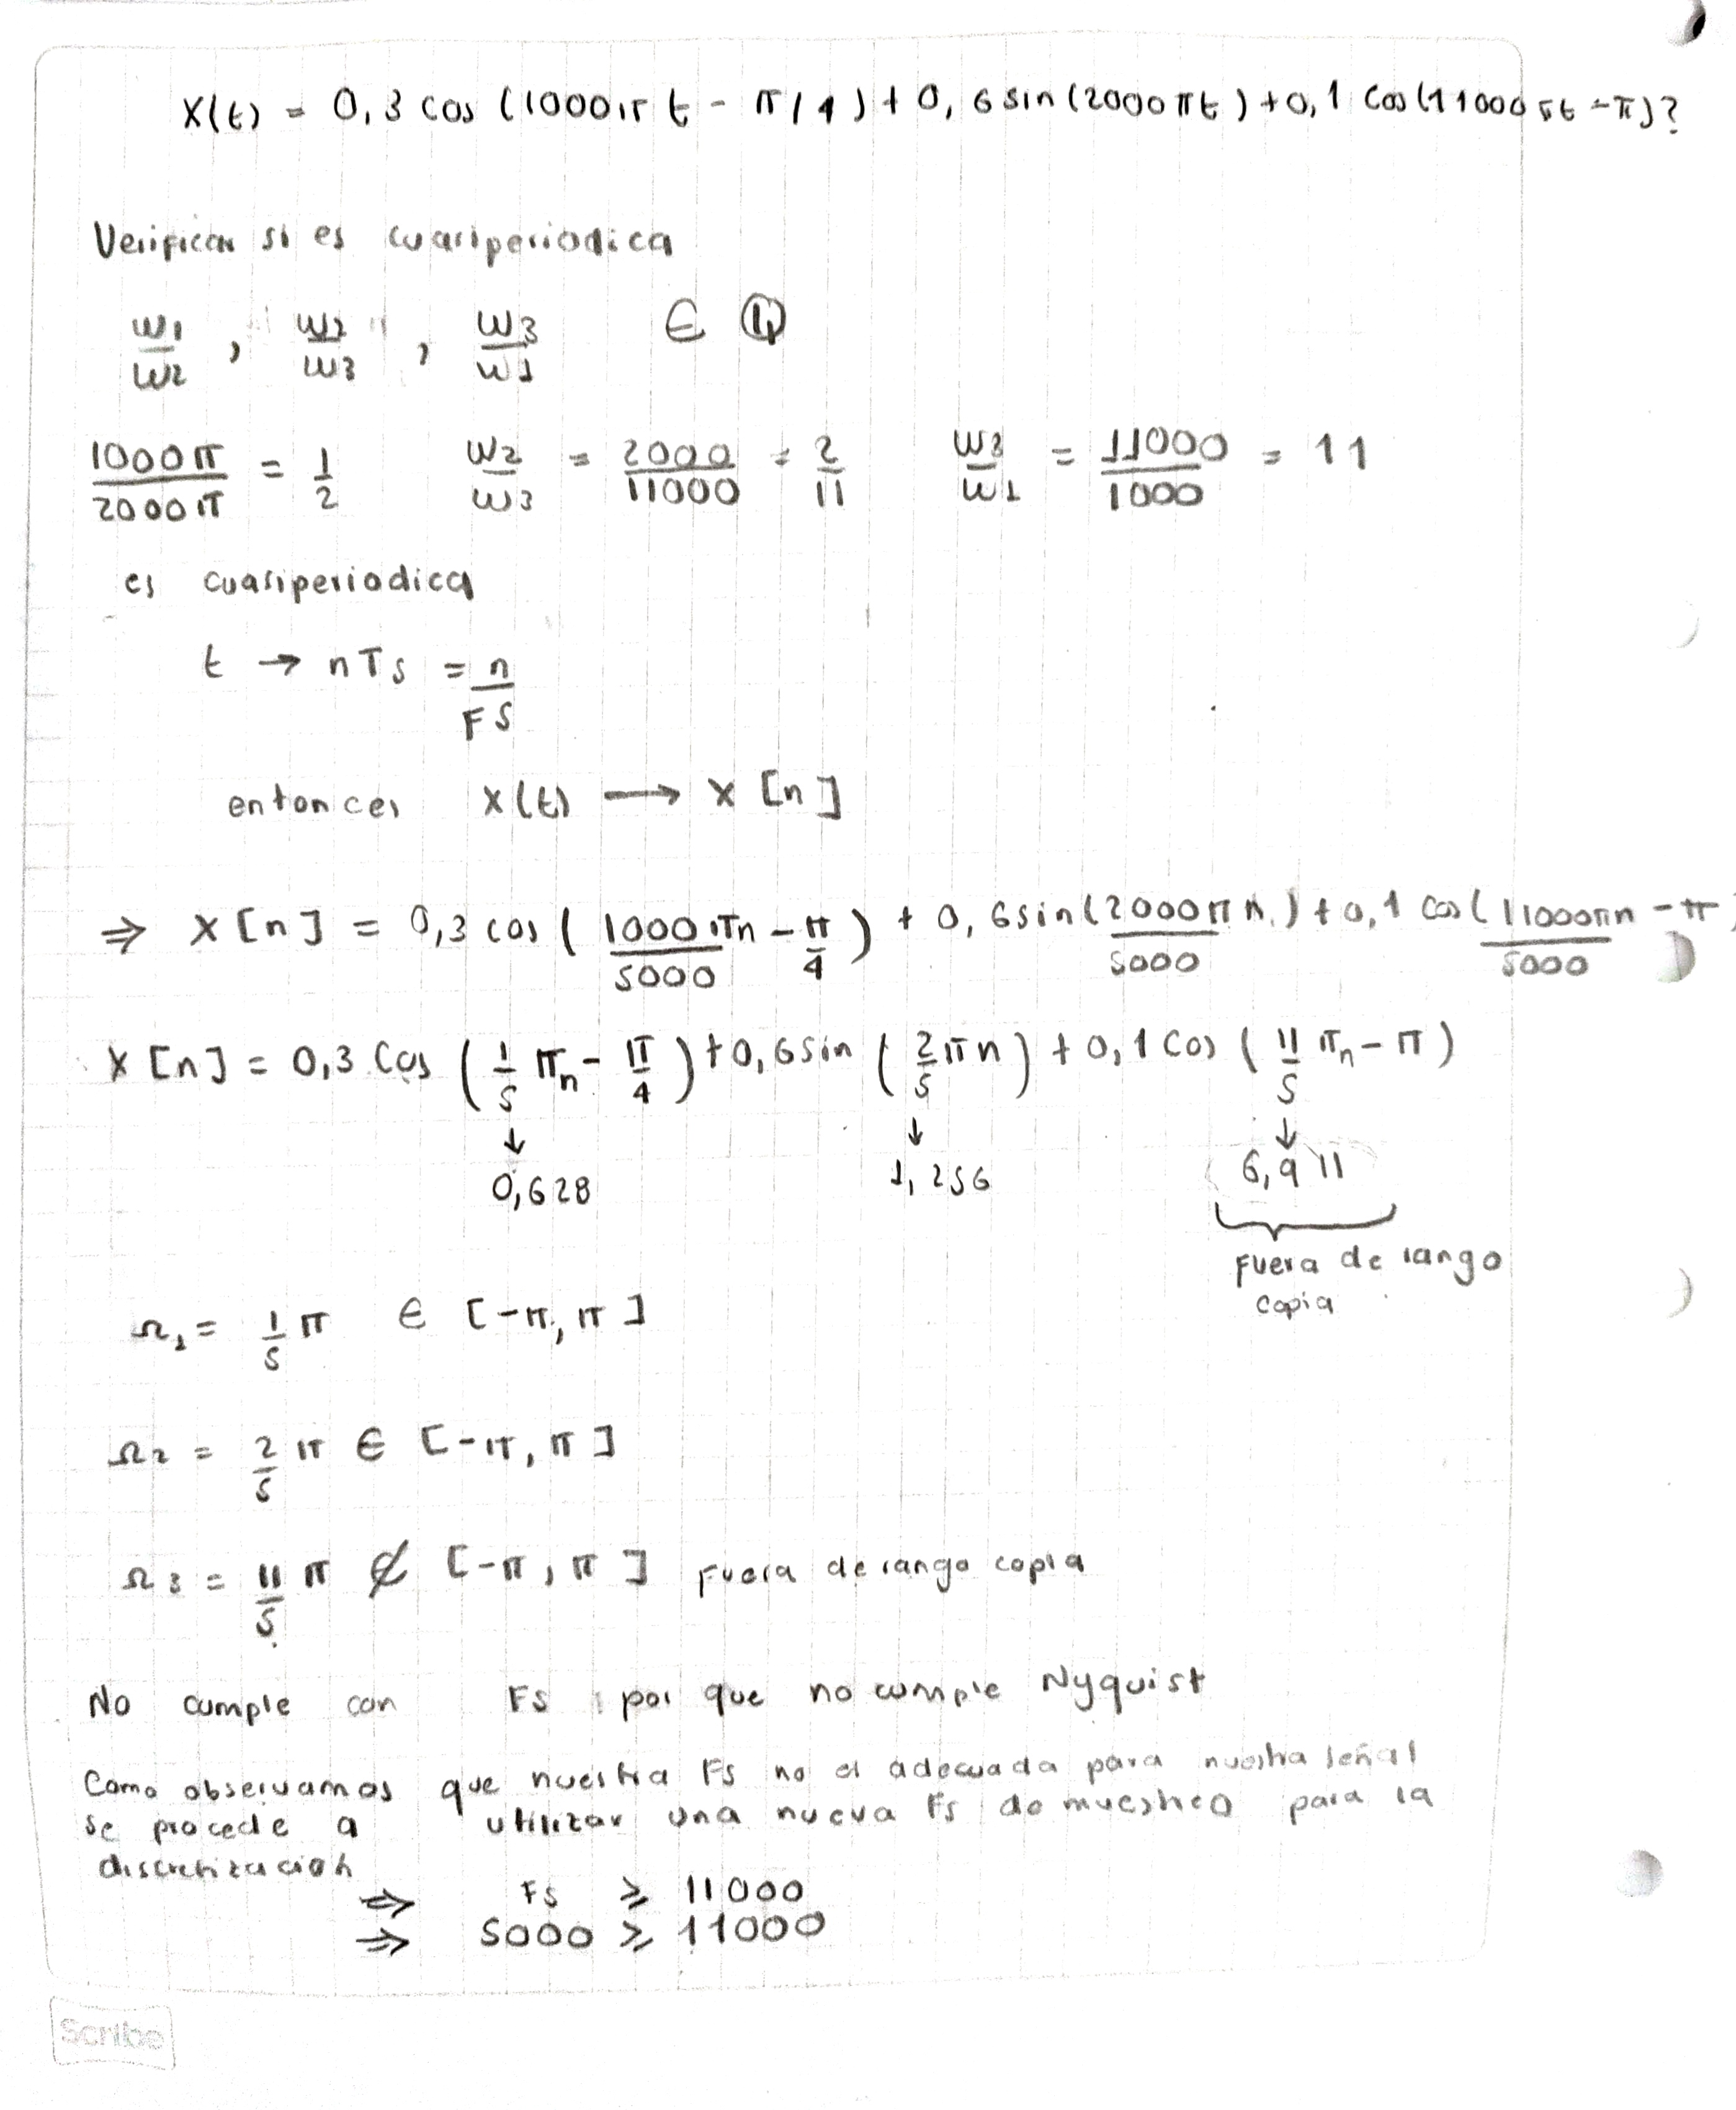

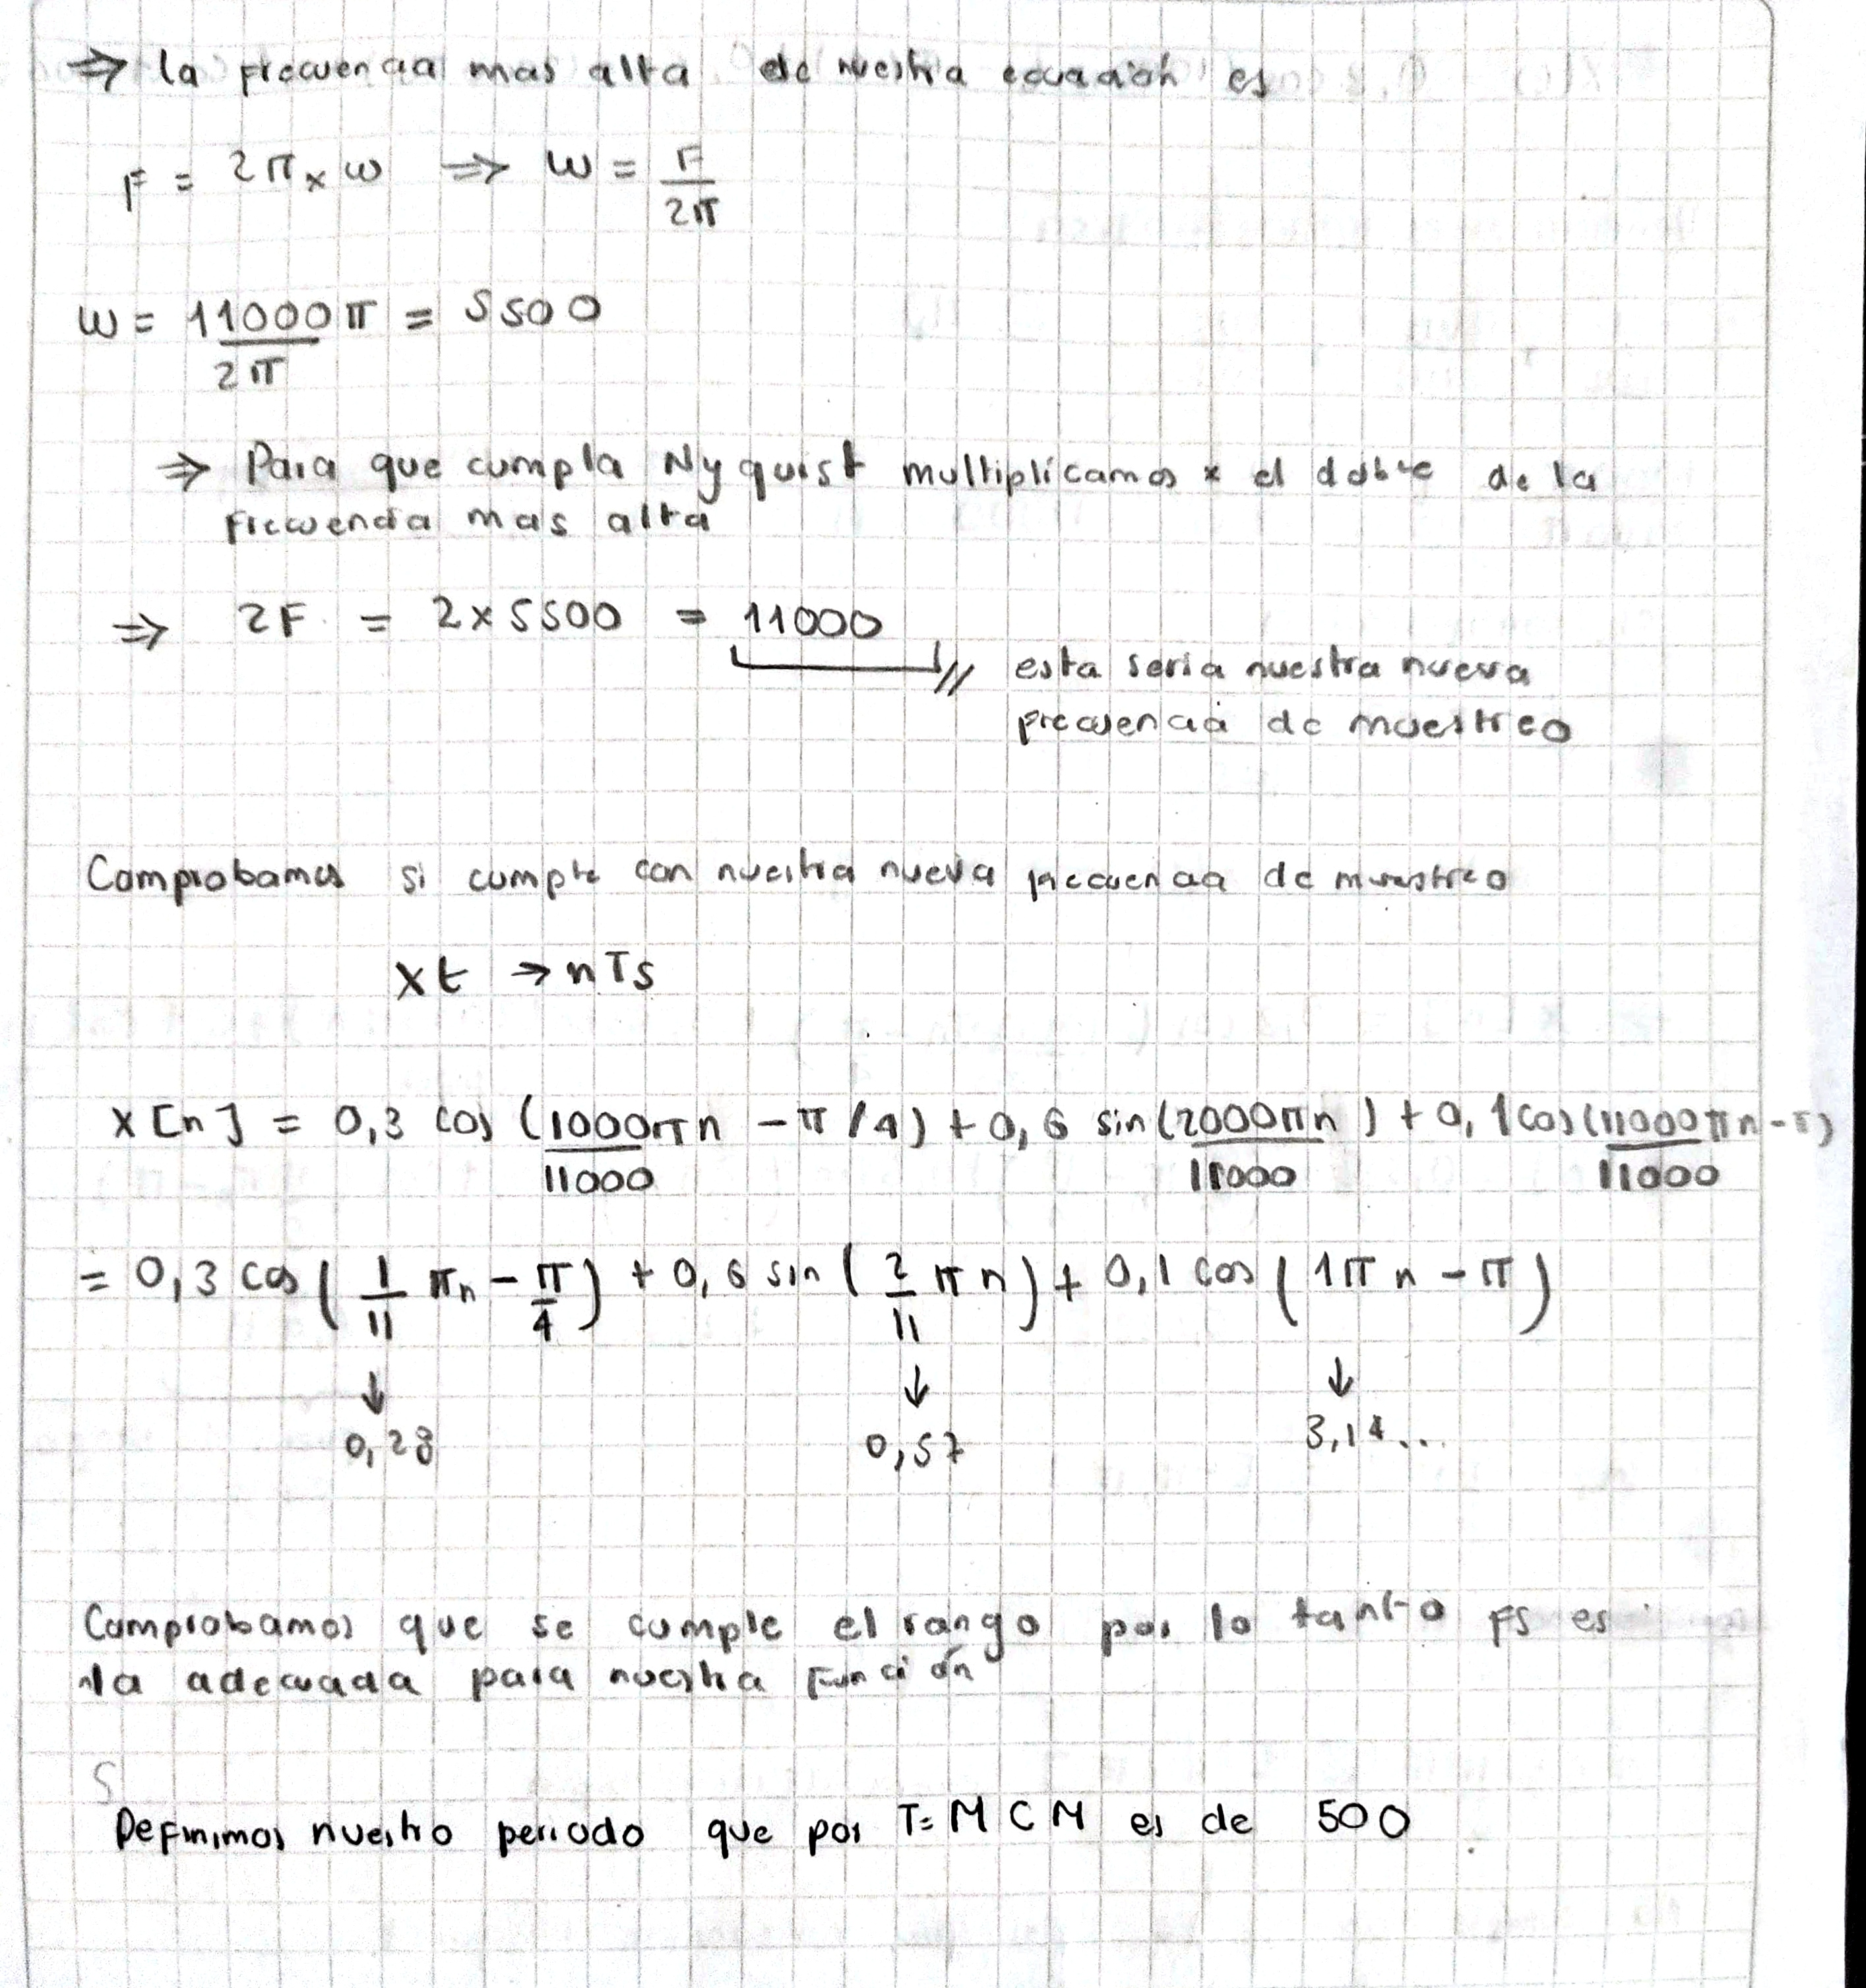

# Pregunta 2 (valor 2.5 puntos)

Se dispone de un sistema modelado como una "caja negra" (ver celdas de código). Su tarea es analizar y comprobar mediante simulaciones si el sistema cumple con las propiedades de linealidad e invariancia en el tiempo. En caso de que el sistema sea lineal e invariante con el tiempo, determine su respuesta al impulso y utilice esta respuesta para calcular la salida del sistema ante la siguiente señal:

$x[n] = \sin[100 \pi n ] + \sin[600 \pi n]$

In [7]:
# cargar sistema
FILEID = "1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O P1_model.zip && rm -rf /tmp/cookies.txt
!unzip -o P1_model.zip
!dir

--2024-12-06 03:14:05--  https://docs.google.com/uc?export=download&confirm=&id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm
Resolving docs.google.com (docs.google.com)... 74.125.197.138, 74.125.197.139, 74.125.197.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.197.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm&export=download [following]
--2024-12-06 03:14:05--  https://drive.usercontent.google.com/download?id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.188.132, 2607:f8b0:400e:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.188.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 732 [application/octet-stream]
Saving to: ‘P1_model.zip’

P1_model.zip        100%[===================>]     732  --.-KB/s    in 

#COMPROBACION DE QUE ES LINEAL
Pasos para verificar la linealidad

Definimos dos señales de entrada:

signal_x1: Una función escalón de Heaviside escalada por 4 y desplazada por 0.02 segundos.
signal_x2: Otra función escalón de Heaviside escalada por 5,  y desplazamiento diferente.

Obtenemos las salidas correspondientes:

y_1: La salida del sistema cuando signal_x1 es la entrada.
y_2: La salida del sistema cuando signal_x2 es la entrada.

Se crea una señal de entrada combinada:

signal_u: Esta es la suma de signal_x1 y signal_x2.
Obtener la salida para la entrada combinada:

y_u: La salida del sistema cuando signal_u es la entrada.

Comparar salidas:

Luego, compararías y_u (salida para la entrada combinada) con y_1 + y_2 (suma de las salidas individuales).

Si el sistema es lineal, estos dos deberían ser iguales (o muy cercanos debido a errores numéricos). Esto se debe a que un sistema lineal obedece al principio de superposición.

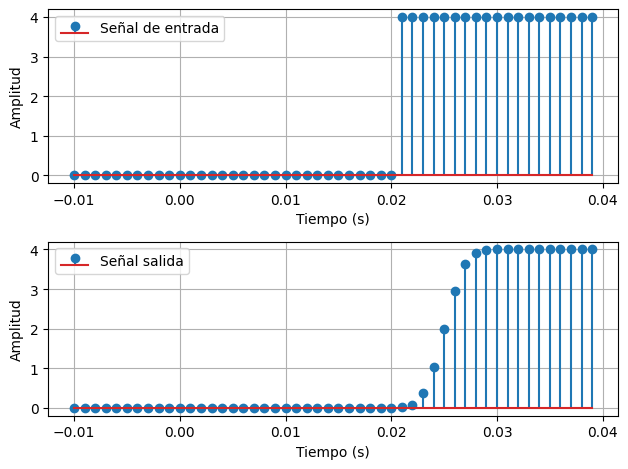

In [8]:
#importar librerias
import numpy as np
import matplotlib.pyplot as plt
import joblib
from P1_model import system_
from scipy.signal import firwin, freqz, lfilter, filtfilt

#sistema pregunta 2
my_system = system_.My_System()
my_system.create_()
fs = my_system.fs #frecuencia de muestreo
t = np.arange(-0.01, 0.04, 1/fs)  # vector de Tiempo
signal_x1 = 4*np.heaviside(t-0.02,1) # función heaviside, SEÑAL DE ENTRADA escalada en 5
y_1 = my_system.predict(signal_x1)


# Visualización de las señales
fig, axs = plt.subplots(2,1)
axs[0].stem(t, signal_x1 ,label='Señal de entrada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,y_1, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()

Al analizar la salida del sistema cuando se le aplica una señal de entrada escalonada con una amplitud de 4, se observa que la amplitud de la señal de salida también es 4. Esto sugiere que el sistema preserva la escala de la señal de entrada, lo cual es una característica de los sistemas lineales. En otras palabras, si escalamos la entrada por un factor, la salida se escala por el mismo factor. En este caso, al escalar la entrada por un factor de 4, la salida también se escala por un factor de 4, lo que indica una posible linealidad del sistema.

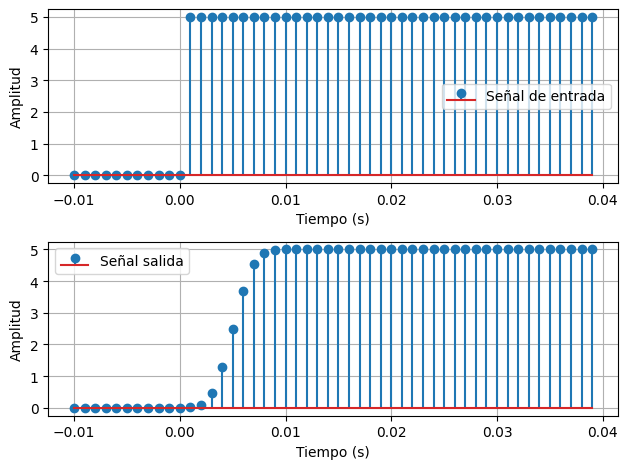

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
from P1_model import system_
from scipy.signal import firwin, freqz, lfilter, filtfilt

#sistema pregunta 2
my_system = system_.My_System()
my_system.create_()
fs = my_system.fs #frecuencia de muestreo
t = np.arange(-0.01, 0.04, 1/fs)  # vector de Tiempo
signal_x2 = 5*np.heaviside(t,1) # función heaviside  SEÑAL DE ENTRADA multiplicada por un escalar= 5
y_2 = my_system.predict(signal_x2)


# Visualización de las señales
fig, axs = plt.subplots(2,1)
axs[0].stem(t, signal_x2, label='Señal de entrada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,y_2, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()

Esta señal de entrada escalonada con una amplitud de 5, se observa que la amplitud de la señal de salida también es 5.

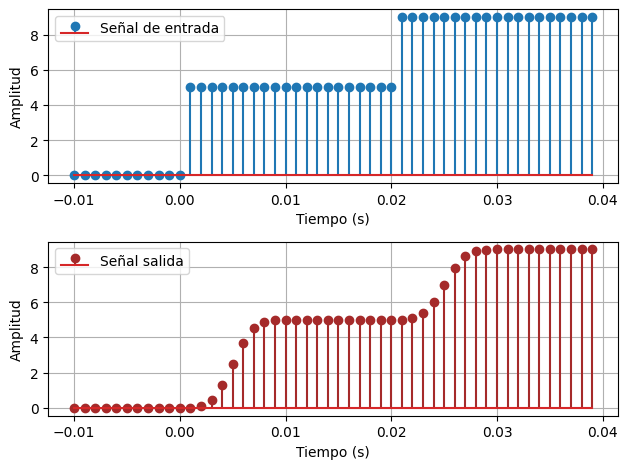

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
from P1_model import system_
from scipy.signal import firwin, freqz, lfilter, filtfilt
import sympy as sym

#sistema pregunta 2
my_system = system_.My_System()
my_system.create_()
fs = my_system.fs #frecuencia de muestreo
t = np.arange(-0.01, 0.04, 1/fs)  # Tiempo
signal_u = signal_x1+signal_x2 # sumamos en el sistema signal_x1+signal_x2
y_u = my_system.predict(signal_u)# salida del sistema



# Visualización de las señales
fig, axs = plt.subplots(2,1)
axs[0].stem(t, signal_u, label='Señal de entrada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,y_u,"brown", label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()


Sumamos signal_x1 + signal_x2

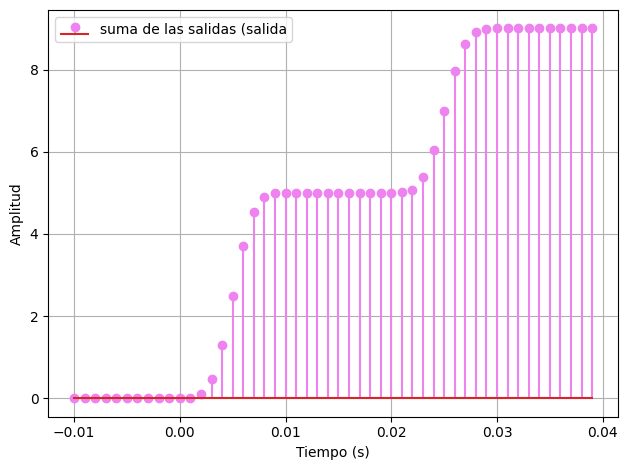

In [28]:
# Visualización de las señales
#fig, axs = plt.subplots(2,1)

plt.stem(t,y_1+y_2,"violet", label='suma de las salidas (salida')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Suma de las salidas de las señales x1 y x2

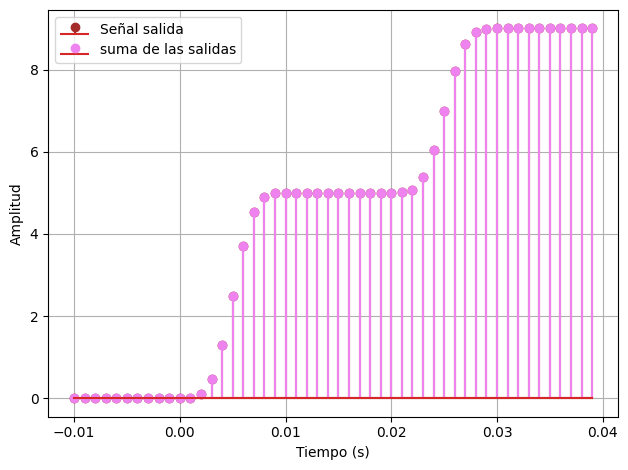

In [31]:
# Visualización de las señales
#fig, axs = plt.subplots(2,1)

plt.stem(t,y_u, "brown", label='Señal salida')
plt.stem(t,y_1+y_2,"violet", label=("suma de las salidas"))
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()




Al comparar la señal de salida del sistema cuando se le aplica la suma de las señales de entrada signal_x1 y signal_x2 (es decir, signal_u), con la suma de las salidas individuales del sistema cuando se le aplican signal_x1 y signal_x2 por separado (es decir, y_1 + y_2), observamos que ambas señales resultantes son prácticamente idénticas.

Esta igualdad entre la salida del sistema ante la suma de las entradas y la suma de las salidas individuales ante cada entrada por separado, confirma que el sistema cumple con el principio de superposición, el cual es un requisito fundamental para la linealidad.

Por lo tanto, con base en esta evidencia experimental, podemos concluir que el sistema bajo análisis se comporta de forma lineal

#RESPUESTA AL IMPULSO

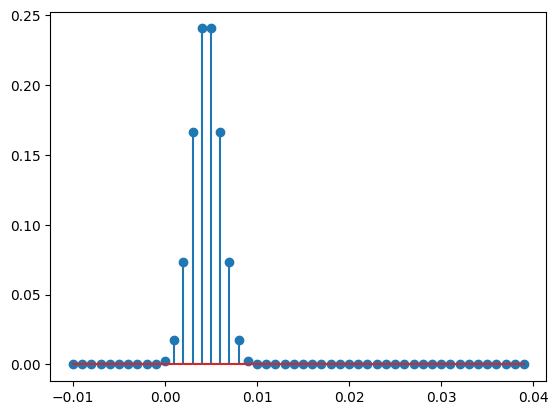

In [13]:
#ORIGINAL
import numpy as np
import matplotlib.pyplot as plt
import joblib
from P1_model import system_
from scipy.signal import firwin, freqz, lfilter, filtfilt

#sistema pregunta 2
my_system = system_.My_System()
my_system.create_()
fs = my_system.fs #frecuencia de muestreo
t = np.arange(-0.01, 0.04, 1/fs)  # vector de Tiempo
signal_u = np.heaviside(t,1) # función heaviside
y_u = my_system.predict(signal_u)


h=np.diff(y_u) ## Calcula la respuesta al impulso como la derivada de la respuesta al escalón.

plt.stem(t,np.append(h,0)) #grafica la respuesta al impulso en barras verticales
plt.show()

$x[n] = \sin[100 \pi n ] + \sin[600 \pi n]$

<StemContainer object of 3 artists>

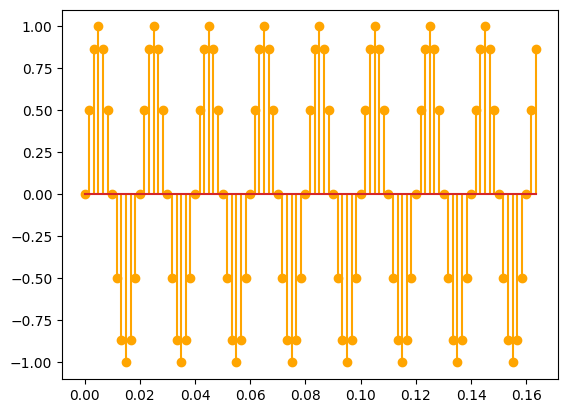

In [19]:
n = np.arange(0,0.165,1/600) # Crea un vector de tiempo para la señal.
yfinal = np.sin(100*np.pi*n)+np.sin(600*np.pi*n) # Define la señal de entrada.
plt.stem(n,yfinal,"orange")

<StemContainer object of 3 artists>

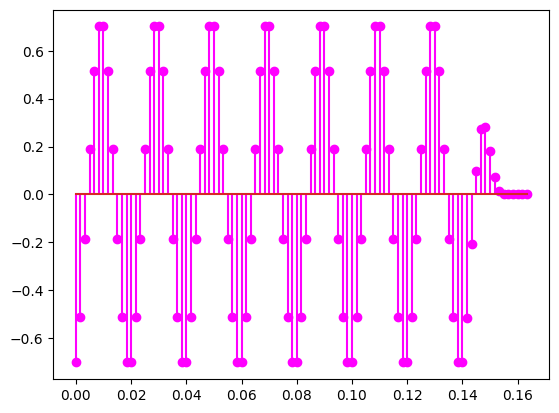

In [16]:
ycon = np.convolve(h,yfinal,mode="same") # Calcula la salida del sistema usando la convolución.

plt.stem(n,ycon,"magenta") # Grafica la salida del sistema.


Al convolucionar la respuesta al impulso con la señal de entrada, se obtiene la salida del sistema ante esa entrada específica.